In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

path = '/home/diegues/Desktop/ProcessedImages/'
labeled_data = pd.read_csv(path + 'labeled_data.csv')

In [5]:
folders = []
for folder in [f for f in os.listdir(path) if os.path.isdir(path + f)]:
    if folder[0] in '0123456789':
        folders.append(folder)
folders.sort()
print(folders)        

['104728_cam-np3', '105317_cam-np3', '113610_cam_survey_1', '125355_forcadinho-np3', '132143_forcadinho-np3']


In [6]:
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()

i = 0

for f in folders:
    datafile = path + f + "/" + f + ".csv"
    if not os.path.exists(datafile):
        print(datafile + "doesn't exist!")
        break
    data = pd.read_csv(datafile, 
                       names=['filename', 'timestamp', 'latitude', 'longitude', 'altitude', 'roll', 'pitch', 'depth', 'entropy', 'date'])[1:]
    data = data.drop(['altitude', 'depth'], axis = 1)
    targetsfile = path + f + "/" + f + "-targets.csv"
    if not os.path.exists(targetsfile):
        print(targetsfile + "doesn't exist!")
        continue
    targets = pd.read_csv(targetsfile,
                          names=['filename', 'date', 'longitude', 'latitude', 'depth', 'EunisCode', 'EunisName', 'level1', 'level2', 'level3', 'level4', 'level5', 'level6', 
                                 'species', 'AphiaID'])[1:]
    targets = targets.drop(['date', 'longitude', 'latitude'], axis=1)
    join_dfs = pd.merge(data, targets, on='filename', how='outer')
    non_empty_targets = join_dfs[join_dfs['EunisCode'].notnull()]
    if i == 0:
        df0 = non_empty_targets
        filenames = df0['filename']
        targets = df0['level3']
        species = pd.get_dummies(df0['species'])
        df0 = df0.drop(['roll', 'pitch', 'level1', 'level2', 'level3', 'level4',
          'level5', 'level6', 'AphiaID', 'EunisName', 'EunisCode', 
          'date', 'timestamp', 'species'], axis = 1)
        df0 = pd.concat([df0, species, targets], axis = 1).groupby('filename').max()
        i += 1
    elif i == 1:
        df1 = non_empty_targets
        filenames = df1['filename']
        targets = df1['level3']
        species = pd.get_dummies(df1['species'])
        df1 = df1.drop(['roll', 'pitch', 'level1', 'level2', 'level3', 'level4',
          'level5', 'level6', 'AphiaID', 'EunisName', 'EunisCode', 
          'date', 'timestamp', 'species'], axis = 1)
        df1 = pd.concat([df1, species, targets], axis = 1).groupby('filename').max()
        i += 1
    elif i == 2:
        df2 = non_empty_targets
        filenames = df2['filename']
        targets = df2['level3']
        species = pd.get_dummies(df2['species'])
        df2 = df2.drop(['roll', 'pitch', 'level1', 'level2', 'level3', 'level4',
          'level5', 'level6', 'AphiaID', 'EunisName', 'EunisCode', 
          'date', 'timestamp', 'species'], axis = 1)
        df2 = pd.concat([df2, species, targets], axis = 1).groupby('filename').max()
        i += 1
    elif i == 3:
        df3 = non_empty_targets
        filenames = df3['filename']
        targets = df3['level3']
        species = pd.get_dummies(df3['species'])
        df3 = df3.drop(['roll', 'pitch', 'level1', 'level2', 'level3', 'level4',
          'level5', 'level6', 'AphiaID', 'EunisName', 'EunisCode', 
          'date', 'timestamp', 'species'], axis = 1)
        df3 = pd.concat([df3, species, targets], axis = 1).groupby('filename').max()
        i += 1
    elif i == 4:
        df4 = non_empty_targets
        filenames = df4['filename']
        targets = df4['level3']
        species = pd.get_dummies(df4['species'])
        df4 = df4.drop(['roll', 'pitch', 'level1', 'level2', 'level3', 'level4',
          'level5', 'level6', 'AphiaID', 'EunisName', 'EunisCode', 
          'date', 'timestamp', 'species'], axis = 1)
        df4 = pd.concat([df4, species, targets], axis = 1).groupby('filename').max()
        i += 1

In [78]:
df0.level3.value_counts()

A4.1    22
Name: level3, dtype: int64

309.85714285714283 178.0


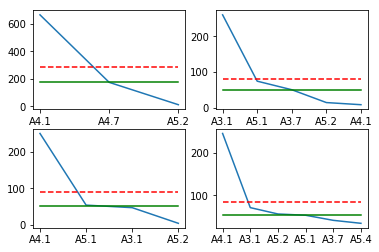

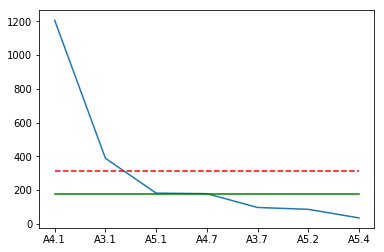

In [74]:
plt.figure(1)

plt.subplot(221)
plt.plot(df1.level3.value_counts())
plt.plot([np.mean(df1.level3.value_counts())]*len(df1.level3.value_counts()), color='red', linestyle = '--')
plt.plot([np.median(df1.level3.value_counts())]*len(df1.level3.value_counts()), color='green')

plt.subplot(222)
plt.plot(df2.level3.value_counts())
plt.plot([np.mean(df2.level3.value_counts())]*len(df2.level3.value_counts()), color='red', linestyle = '--')
plt.plot([np.median(df2.level3.value_counts())]*len(df2.level3.value_counts()), color='green')

plt.subplot(223)
plt.plot(df3.level3.value_counts())
plt.plot([np.mean(df3.level3.value_counts())]*len(df3.level3.value_counts()), color='red', linestyle = '--')
plt.plot([np.median(df3.level3.value_counts())]*len(df3.level3.value_counts()), color='green')

plt.subplot(224)
plt.plot(df4.level3.value_counts())
plt.plot([np.mean(df4.level3.value_counts())]*len(df4.level3.value_counts()), color='red', linestyle = '--')
plt.plot([np.median(df4.level3.value_counts())]*len(df4.level3.value_counts()), color='green')

plt.savefig('classes_per_log.jpg')

fig,ax = plt.subplots()
x = labeled_data.level3.value_counts()
y_mean = [np.mean(x)]*len(x)
y_median = [np.median(x)]*len(x)
print(np.mean(x), np.median(x))
ax.plot(x)
ax.plot(y_mean, color='red', linestyle = '--')
ax.plot(y_median, color='green')

plt.savefig('aggregated_data.jpg')

In [45]:
df_a41 = labeled_data[labeled_data['level3'] == 'A4.1']
df_a31 = labeled_data[labeled_data['level3'] == 'A3.1']
df_a51 = labeled_data[labeled_data['level3'] == 'A5.1']
df_a47 = labeled_data[labeled_data['level3'] == 'A4.7']
df_a37 = labeled_data[labeled_data['level3'] == 'A3.7']
df_a52 = labeled_data[labeled_data['level3'] == 'A5.2']
df_a54 = labeled_data[labeled_data['level3'] == 'A5.4']


In [49]:
median = int(np.median(labeled_data.level3.value_counts()))
print('A4.1:',len(df_a41),'\nA3.1:',len(df_a31),'\nA5.1:',len(df_a51),'\nA4.7:',len(df_a47),'\nA3.7:',len(df_a37),
      '\nA5.2:',len(df_a52),'\nA5.4:', len(df_a54), '\nMedian:',median)


A4.1: 1207 
A3.1: 388 
A5.1: 181 
A4.7: 178 
A3.7: 96 
A5.2: 85 
A5.4: 34 
Median: 178


In [56]:
sampled_a41 = df_a41.sample(median)
sampled_a31 = df_a31.sample(median)
sampled_a51 = df_a51.sample(median)
sampled_a47 = df_a47.sample(median)
sampled_a37 = df_a37
sampled_a52 = df_a52
sampled_a54 = df_a54

In [57]:
sampled_df = pd.concat([sampled_a31,sampled_a37,sampled_a41,sampled_a47,sampled_a51,sampled_a52, sampled_a54])

In [58]:
sampled_df[:5]

,filename,timestamp,latitude,longitude,roll,pitch,entropy,date,depth,EunisCode,EunisName,level1,level2,level3,level4,level5,level6,species,AphiaID
2082,113610_cam_survey_1_frame2013.jpg,1.525176e+09,41.53330,-8.80762,-1.62,-19.97,21.909578,01/05/18,9.45,A3.11,Kelp with cushion fauna and/or foliose red sea...,A,A3,A3.1,A3.11,NaN,NaN,NaN,NaN
2115,113610_cam_survey_1_frame2676.jpg,1.525176e+09,41.53336,-8.80589,-3.10,-18.89,21.810189,01/05/18,8.09,A3.11,Kelp with cushion fauna and/or foliose red sea...,A,A3,A3.1,A3.11,NaN,NaN,NaN,NaN
1934,113610_cam_survey_1_frame962.jpg,1.525175e+09,41.53322,-8.81097,-1.48,-17.99,21.907689,01/05/18,10.21,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,NaN,NaN
245,132143_forcadinho-np3_frame1283.jpg,1.525183e+09,41.53297,-8.80974,0.06,-25.89,21.897980,01/05/18,9.54,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,NaN,NaN
1858,113610_cam_survey_1_frame699.jpg,1.525175e+09,41.53322,-8.81165,-16.29,-19.78,21.914735,01/05/18,12.14,A3.1,Atlantic and Mediterranean high energy infrali...,A,A3,A3.1,NaN,NaN,NaN,NaN,NaN


132.42857142857142


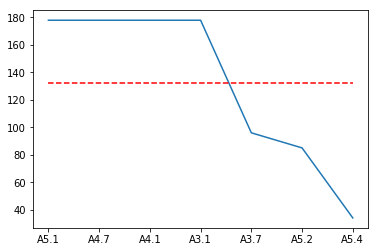

In [75]:
plt.plot(sampled_df.level3.value_counts())
plt.plot([np.mean(sampled_df.level3.value_counts())]*len(sampled_df.level3.value_counts()), color='red', linestyle = '--')
plt.savefig('sampled_data.jpg')
print(np.mean(sampled_df.level3.value_counts()))

In [80]:
sampled_df.to_csv('sampled_data.csv', index=False)